# **LIBRARIES**

In [169]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
# from tensorflow.keras.applications.EfficientNetB0 import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import matplotlib.image as mpimg
import pandas as pd
import wandb
import random
from wandb.keras import WandbCallback

ModuleNotFoundError: No module named 'tensorflow.keras.applications.EfficientNetB0'

# **FOLDER TO .CSV**

In [ ]:
# Rename folder with wrong spell, Kaggle just only-read folder 
# os.rename('../input/teeth-dataset/teeth_dataset/teeth_dataset/Trianing','../input/teeth-dataset/teeth_dataset/teeth_dataset/train')

In [31]:
#FIXME: When upload dataset other
BASE_DIR = 'teeth_dataset'
train_folder = os.path.join(BASE_DIR,'train')
test_folder = os.path.join(BASE_DIR,'test')

# label_ = os.listdir(train_folder) #[caries,no-caries]
# TRAIN TO CSV
df_train = pd.DataFrame()
df_image = []
df_label = []

label_num = 0

for i_label in os.listdir(train_folder):
    for j_image in sorted(os.listdir(os.path.join(train_folder,i_label))): #return full images within the folder
        df_image.append(os.path.join('train',i_label,j_image)) # return path_image
        df_label.append(label_num)
    label_num += 1
df_train['images'] = df_image
df_train['target'] = df_label
#caries = 0, no-caries = 1
df_train.to_csv(os.path.join(BASE_DIR,'train.csv'))

# TEST TO CSV
df_test = pd.DataFrame()
df_image = []
df_label = []

label_num = 0

for i_label in os.listdir(test_folder):
    for j_image in sorted(os.listdir(os.path.join(test_folder,i_label))): #return full images within the folder
        df_image.append(os.path.join('test',i_label,j_image))
        df_label.append(label_num)
    label_num += 1
df_test['images'] = df_image
df_test['target'] = df_label
#caries = 0, no-caries = 1
df_test.to_csv(os.path.join(BASE_DIR,'test.csv'))

In [34]:
df_train.head(),df_test.head()

(                  images  target
 0  train\caries\wc10.jpg       0
 1  train\caries\wc11.jpg       0
 2  train\caries\wc12.jpg       0
 3  train\caries\wc13.jpg       0
 4  train\caries\wc14.jpg       0,
                  images  target
 0   test\caries\wc1.jpg       0
 1   test\caries\wc2.jpg       0
 2  test\caries\wc44.jpg       0
 3  test\caries\wc45.jpg       0
 4  test\caries\wc49.jpg       0)

# VISUALIZATION DATASET

In [38]:
print('Number of train images:',len(df_train))
print('Number of test images:',len(df_test))

Number of train images: 60
Number of test images: 14


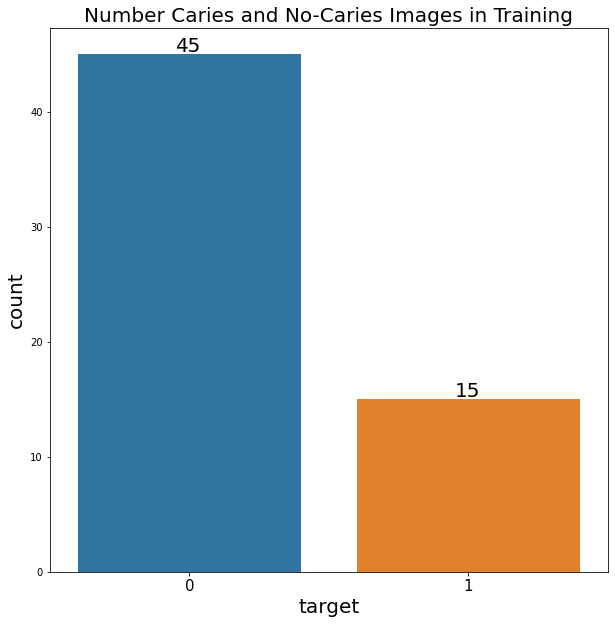

In [83]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'target', data = df_train)
ax.set_title('Number Caries and No-Caries Images in Training', size=20)
ax.set_xlabel("Label",fontsize=20)
ax.set_ylabel("Number",fontsize=20)
ax.set_xticklabels(['Caries', 'No-Caries'],fontsize=15)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.2),fontsize=20)

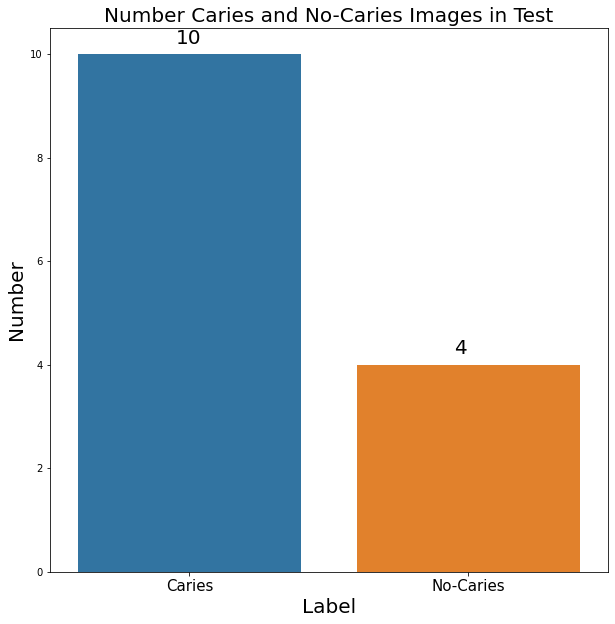

In [85]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'target', data = df_test)
ax.set_title('Number Caries and No-Caries Images in Test', size=20)
ax.set_xlabel("Label",fontsize=20)
ax.set_ylabel("Number",fontsize=20)
ax.set_xticklabels(['Caries', 'No-Caries'],fontsize=15)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.2),fontsize=20)

Text(0.5, 1.0, '% Carries and No-Caries In Train')

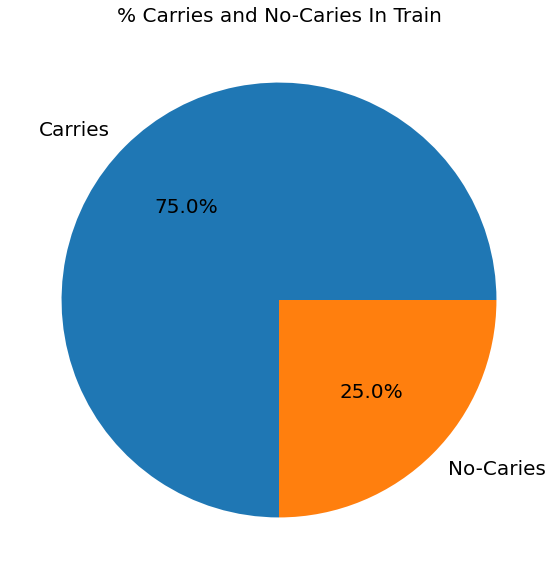

In [99]:
bar, ax = plt.subplots(figsize = (10,10))
bar.patch.set_facecolor('white')
plt.pie(df_train['target'].value_counts(), 
        labels = ['Carries','No-Caries'], 
        autopct="%.1f%%",textprops={'fontsize':20})
plt.title('% Carries and No-Caries In Train', size=20)

Text(0.5, 1.0, '% Carries and No-Caries In Test')

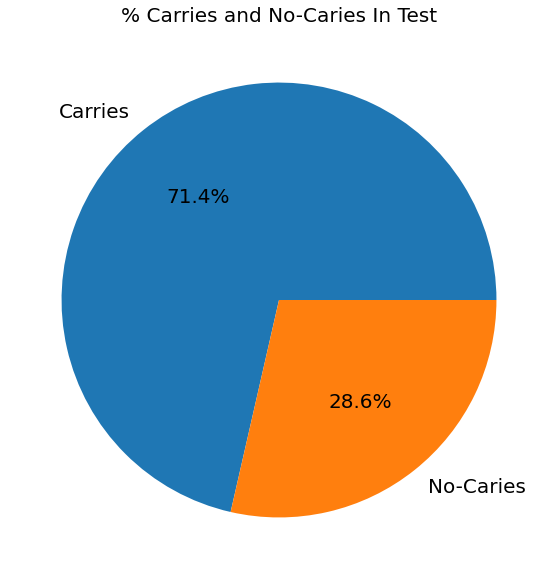

In [101]:
bar, ax = plt.subplots(figsize = (10,10))
bar.patch.set_facecolor('white')
plt.pie(df_test['target'].value_counts(), 
        labels = ['Carries','No-Caries'], 
        autopct="%.1f%%",textprops={'fontsize':20})
plt.title('% Carries and No-Caries In Test', size=20)

In [152]:
# Print Shape of dataset to choose rescale
# for i in os.listdir(os.path.join(BASE_DIR,'train','caries')):
#     im = cv2.imread(os.path.join(BASE_DIR,'train','caries',i)) #H,W,C
    # print(im.shape)
# for i in os.listdir(os.path.join(BASE_DIR,'train','caries')):
#     im = cv2.imread(os.path.join(BASE_DIR,'train','caries',i)) #H,W,C

# for i in os.listdir(os.path.join(BASE_DIR,'train','caries')):
#     im = cv2.imread(os.path.join(BASE_DIR,'train','caries',i)) #H,W,C

# for i in os.listdir(os.path.join(BASE_DIR,'train','caries')):
#     im = cv2.imread(os.path.join(BASE_DIR,'train','caries',i)) #H,W,C

print('Choose 112x112 rescale is best choice')

Choose 112x112 rescale is best choice


In [123]:
# random_file=random.choice(os.listdir(os.path.join(BASE_DIR,'train','caries')))
# print(random_file)

wc26.jpg


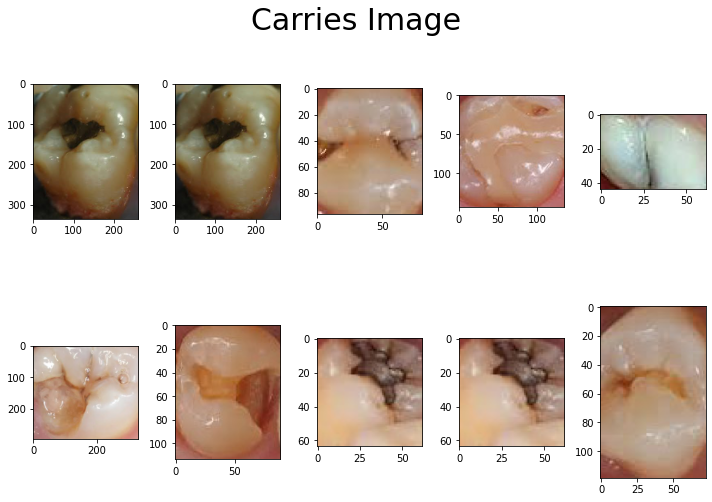

In [146]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
f.suptitle('Carries Image',x=0.5,y=0.8,fontsize=30,verticalalignment='bottom')
k = 0
for i in range(2):
    for j in range(5):
        img = cv2.imread(os.path.join('teeth_dataset','train','caries',random.choice(os.listdir(os.path.join(BASE_DIR,'train','caries')))))
        # im_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
        ax[i,j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        k = k + 1
    plt.tight_layout()

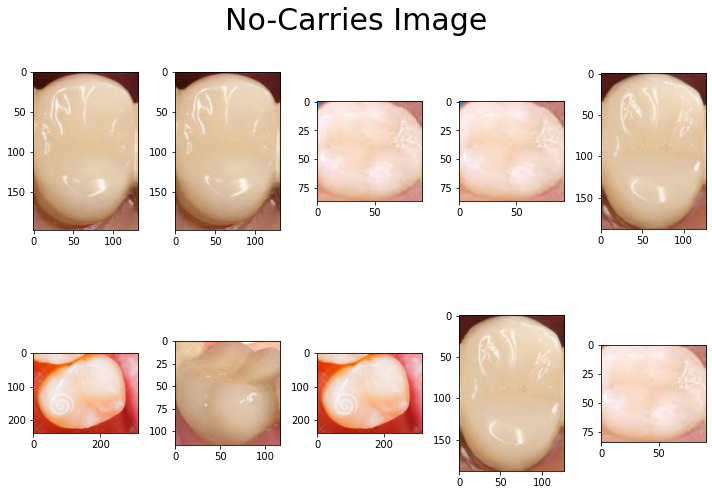

In [149]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
f.suptitle('No-Carries Image',x=0.5,y=0.8,fontsize=30,verticalalignment='bottom')
k = 0
for i in range(2):
    for j in range(5):
        img = cv2.imread(os.path.join('teeth_dataset','train','no-caries',random.choice(os.listdir(os.path.join(BASE_DIR,'train','no-caries')))))
        # im_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
        ax[i,j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        k = k + 1
    plt.tight_layout()

Over-Sample If want

In [105]:
# from imblearn.over_sampling import RandomOverSampler 
# oversample = RandomOverSampler()
# x,y = oversample.fit_resample(df_train['images'],df_train['target'])
# https://stackoverflow.com/questions/41815354/keras-flow-from-directory-over-or-undersample-a-class

# BUILD DATALOADER


In [150]:
# Set up Generator
train_generate = ImageDataGenerator( 
    rescale = 1.0/255.,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=(0.5, 1.5),
)
val_generate = ImageDataGenerator(rescale=1./255.)

In [167]:
# Set up dataload
train_datagen = train_generate.flow_from_directory(
    train_folder, 
    batch_size=10,
    target_size=(112, 112)
)
val_datagen = val_generate.flow_from_directory(
    test_folder, 
    batch_size=round(len(df_test)/2), # 14/2 = 7
    target_size=(112, 112)
)

Found 60 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [ ]:
# images after Generator
test = train_generate.flow_from_directory(
    train_folder, 
    batch_size=1)

In [171]:
# https://keras.io/api/applications/efficientnet/
model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(112, 112, 3))

In [172]:
# Functone train
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)